## 📌 Title:
US Flight Delay Analysis and Root Cause Identification

---

## 🎯 Project Objective

The objective of this project is to conduct a comprehensive analysis of US domestic flight delay data to identify trends, root causes, and actionable insights. By examining flight operations over time, the project aims to:

- Explore the overall delay patterns across years, months, carriers, and airports.
- Perform root cause analysis (RCA) to identify specific factors contributing to flight delays.
- Visualize delays based on counts, delay minutes, and delay ratios for effective interpretation.
- Assist stakeholders (airlines, airports, passengers) in understanding the sources of inefficiency.
- Support data-driven recommendations to reduce delays and optimize air travel performance.

---

## 🎯 EDA Objective

- Understand temporal and spatial patterns of flight delays.
- Compare performance of airports and carriers in terms of delays.
- Measure delay burden across various causes: weather, carrier, security, NAS, and late aircraft.
- Calculate and visualize ratios to normalize delay counts and minutes against total flights and delayed flights.
- Generate insights to guide future infrastructure, policy, and operational improvements.

---

## 📊 Dataset Description

The dataset provides detailed information on flight arrival operations, delay causes, and flight disruptions such as cancellations and diversions. Each row summarizes statistics by year, month, carrier, and airport. The columns are defined as follows:

| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `year`                | Year in YYYY format                                                         |
| `month`               | Month in MM format (1-12)                                                   |
| `carrier`             | US DOT-assigned code identifying a unique airline carrier                   |
| `carrier_name`        | Full name of the unique airline, defined by its DOT certificate             |
| `airport`             | 3-letter alphanumeric airport code assigned by the US DOT                  |
| `airport_name`        | Official name of the airport                                                |
| `arr_flights`         | Total number of arrival flights                                             |
| `arr_del15`           | Number of arrival flights delayed by 15 minutes or more                    |
| `carrier_ct`          | Count of delays due to airline-related issues                               |
| `weather_ct`          | Count of delays due to weather-related issues                               |
| `nas_ct`              | Count of delays due to National Airspace System issues                      |
| `security_ct`         | Count of delays due to security-related issues                              |
| `late_aircraft_ct`    | Count of delays due to late arrival of aircraft from a previous flight      |
| `arr_cancelled`       | Number of arrival flights that were cancelled                               |
| `arr_diverted`        | Number of arrival flights that were diverted                                |
| `arr_delay`           | Net difference in arrival time (actual - scheduled), in minutes             |
| `carrier_delay`       | Total minutes of delay caused by the carrier                                |
| `weather_delay`       | Total minutes of delay caused by weather                                    |
| `nas_delay`           | Total minutes of delay caused by NAS issues                                 |
| `security_delay`      | Total minutes of delay caused by security issues                            |
| `late_aircraft_delay` | Total minutes of delay caused by late-arriving aircraft                     |

This structured dataset forms the foundation for delay analysis, root cause attribution, and predictive insights on the performance of carriers and airports across time.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os
%matplotlib inline


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report



In [4]:
df=pd.read_csv(r"C:\Users\abhis\Downloads\Airline_Delay_Cause.csv")

In [5]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [7]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,179338.000000,179338.000000,178997.000000,178747.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
mean,2019.480082,6.485725,327.816969,58.709086,18.572643,2.035742,17.094929,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410204,3.463516,931.001446,164.378035,47.389651,6.894812,56.279604,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,41.000000,6.000000,1.960000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,89.000000,15.000000,5.400000,0.220000,3.300000,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,218.000000,40.000000,14.700000,1.620000,9.860000,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [8]:
df.shape

(179338, 21)

In [9]:
import pandas as pd

# Make a copy of the original DataFrame
df_cleaned = df.copy()

# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Loop through each numeric column to remove outliers
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 5* IQR
    upper_limit = Q3 + 5*IQR

    # Keep only rows within the IQR bounds
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_limit) & (df_cleaned[col] <= upper_limit)]

# Reset index after dropping outliers
df_cleaned.reset_index(drop=True, inplace=True)

# Print result
print("Original shape:", df.shape)
print("Shape after outlier removal:", df_cleaned.shape)



Original shape: (179338, 21)
Shape after outlier removal: (107570, 21)


In [10]:
df.isnull().value_counts

<bound method DataFrame.value_counts of          year  month  carrier  carrier_name  airport  airport_name  \
0       False  False    False         False    False         False   
1       False  False    False         False    False         False   
2       False  False    False         False    False         False   
3       False  False    False         False    False         False   
4       False  False    False         False    False         False   
...       ...    ...      ...           ...      ...           ...   
179333  False  False    False         False    False         False   
179334  False  False    False         False    False         False   
179335  False  False    False         False    False         False   
179336  False  False    False         False    False         False   
179337  False  False    False         False    False         False   

        arr_flights  arr_del15  carrier_ct  weather_ct  ...  security_ct  \
0             False      False       False 

In [11]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [12]:
df.fillna(df.median(numeric_only=True), inplace=True)



In [13]:
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

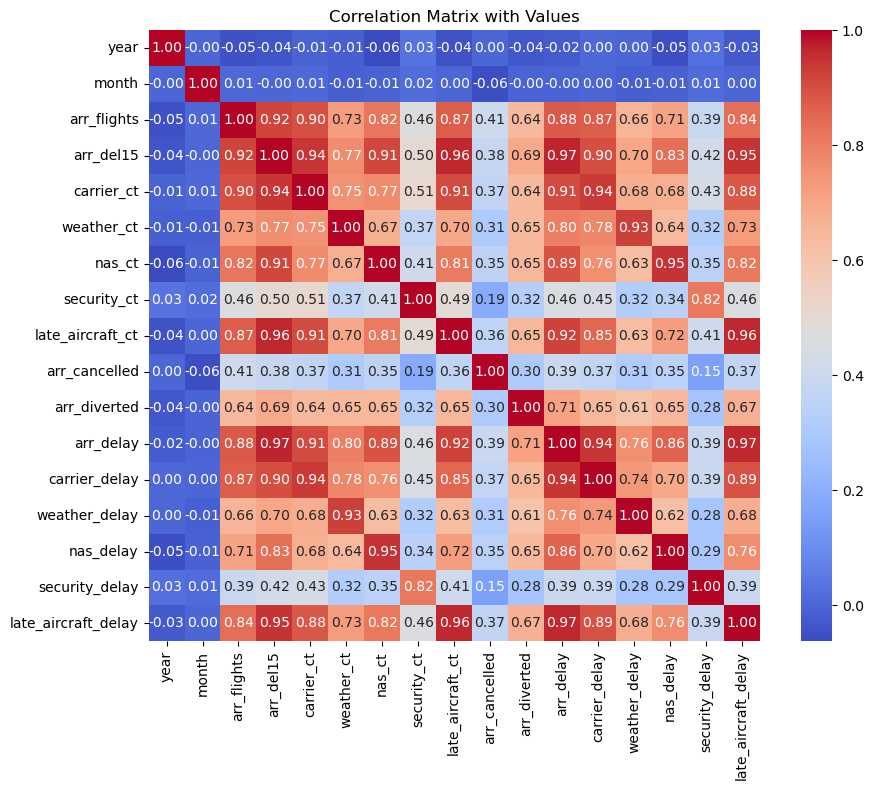

In [14]:
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap with values inside
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)

plt.title("Correlation Matrix with Values")
plt.tight_layout()
plt.show()

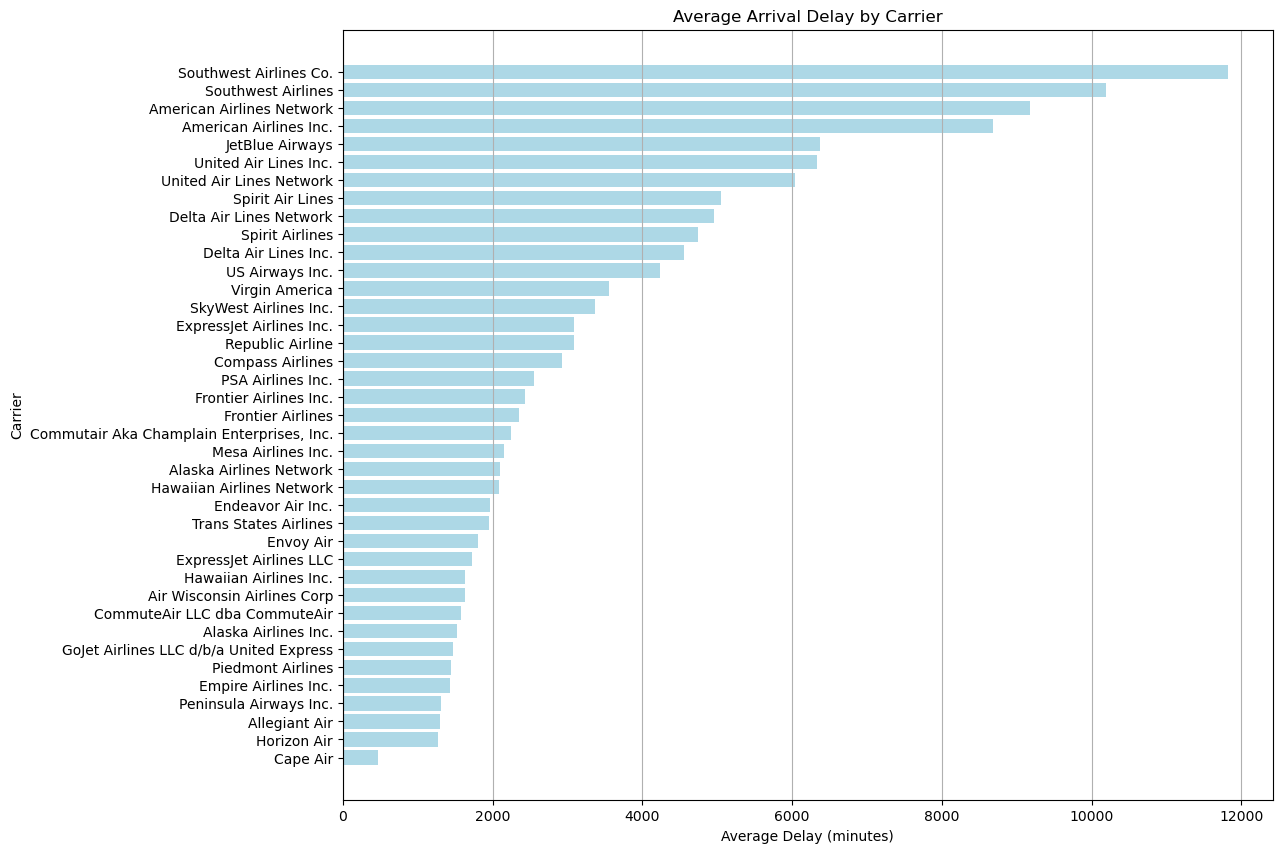

In [15]:
# which carrier has most delays
average_delay_per_carrier = df.groupby('carrier_name')['arr_delay'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 10))
plt.barh(average_delay_per_carrier['carrier_name'], average_delay_per_carrier['arr_delay'], color='lightblue')
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Carrier')
plt.grid(axis='x')
plt.show()

## The average arrival delay varies significantly across airlines, with **Southwest, American, and JetBlue** showing the highest delays, while smaller carriers like **Alaska and Horizon Air** perform better. Extreme delays (up to 12,000 minutes) suggest outliers or systemic operational issues in major airlines. 

In [16]:
yearly = df.groupby('year')[['arr_flights','arr_del15']].sum().reset_index()
yearly['delay_ratio'] = yearly['arr_del15']/yearly['arr_flights']
yearly.sort_values(by = 'arr_flights',ascending=False)

,year,arr_flights,arr_del15,delay_ratio
4,2019,8094354.0,1527980.0,0.188771
3,2018,7851189.0,1482133.0,0.188778
8,2023,7282922.0,1465319.0,0.201199
7,2022,7015021.0,1426830.0,0.203396
6,2021,6315164.0,1068719.0,0.169231
0,2015,5820147.0,1063664.0,0.182756
2,2017,5675511.0,1029699.0,0.181428
1,2016,5619349.0,964569.0,0.171651
5,2020,5034946.0,474025.0,0.094147


### ✈️ Observations from Yearly Trend Analysis

- **Total flight delays are directly proportional to the total number of flights.**  
  As the number of flights increases, the absolute number of delayed flights also tends to rise.

- **Total flight volume has steadily increased in recent years.**  
  This indicates growing air traffic and operational load across the aviation network.

- **Delay ratio remains relatively independent of the year or total flight count.**  
  The proportion of delayed flights does not show a consistent increasing or decreasing trend over the years, suggesting improvements or compensations in delay management practices despite higher flight volumes.


In [17]:
print('Year with most delay', yearly.loc[yearly['arr_del15'].idxmax(),'year'])
print('Year with least delay', yearly.loc[yearly['arr_del15'].idxmin(),'year'])

print('Year with most Flights', yearly.loc[yearly['arr_flights'].idxmax(),'year'])
print('Year with least Flights', yearly.loc[yearly['arr_flights'].idxmin(),'year'])

print('Year with highest delay ratio', yearly.loc[yearly['delay_ratio'].idxmax(),'year'])
print('Year with lowest dealy_ratio', yearly.loc[yearly['delay_ratio'].idxmin(),'year'])


Year with most delay 2019
Year with least delay 2020
Year with most Flights 2019
Year with least Flights 2020
Year with highest delay ratio 2022
Year with lowest dealy_ratio 2020


### 📅 Key Insights from Year-wise Analysis

- **2019 recorded the highest number of flights** and consequently also had the **highest number of delayed flights**, indicating a strong correlation between total flight volume and delay count.

- **2020 had the lowest number of flights**, most likely due to the pandemic, and also showed the **lowest number of delays and the lowest delay ratio**, highlighting reduced air traffic and operational disruptions.(this is majorly due to **COVID 19**)

- **2022 experienced the highest delay ratio**, suggesting that despite fewer flights than 2019, a **larger proportion of flights were delayed**, possibly due to post-pandemic operational challenges or other systemic factors.


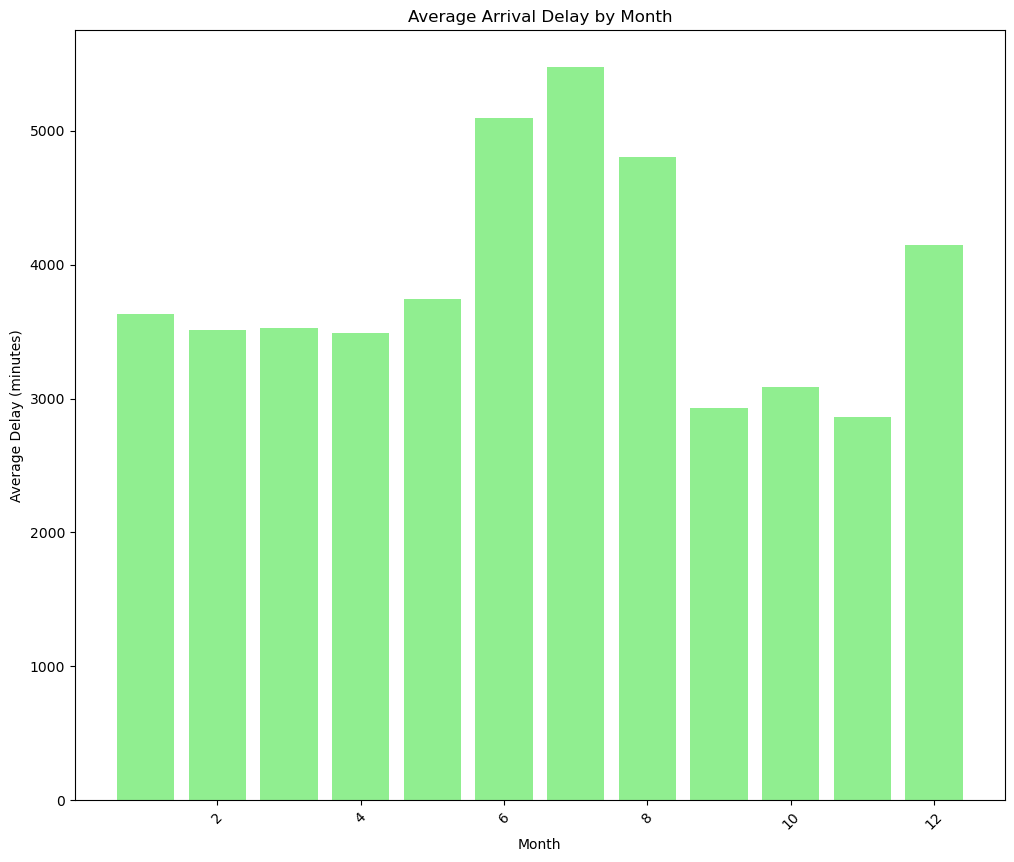

In [18]:
# which month has maximum delays
max_month_delay = df.groupby('month')['arr_delay'].mean().sort_values().reset_index()
plt.figure(figsize=(12, 10))
plt.bar(max_month_delay['month'], max_month_delay['arr_delay'], color='lightgreen')
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')

plt.xticks(rotation=45)
plt.show()



## **Monthly Trends**: Arrival delays peak in the summer months, especially **June and July**, with average delays exceeding **5000 minutes**, indicating seasonal congestion or weather-related disruptions.

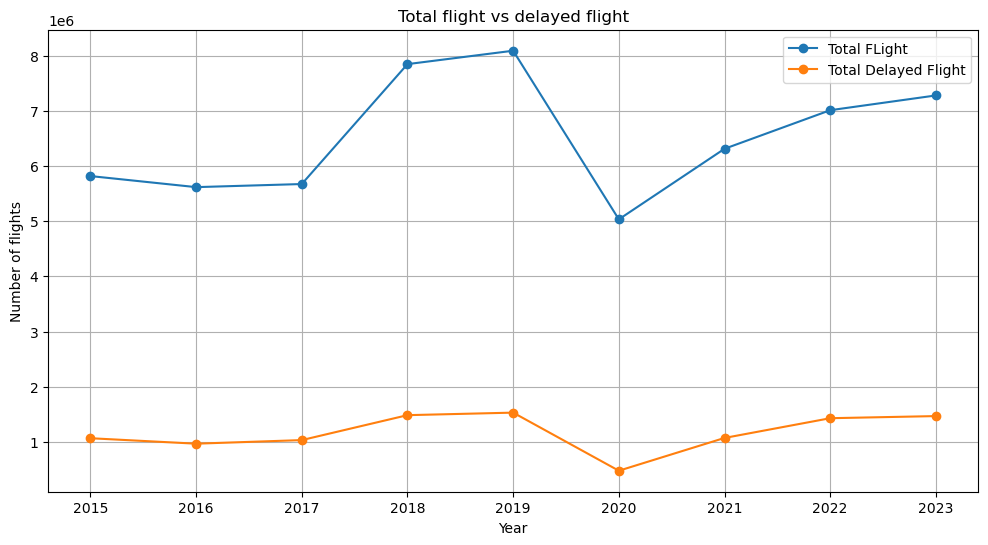

In [19]:
plt.figure(figsize=(12,6))
plt.plot(yearly['year'],yearly['arr_flights'],label='Total FLight', marker = 'o')
plt.plot(yearly['year'],yearly['arr_del15'],label = 'Total Delayed Flight',marker = 'o')
plt.title('Total flight vs delayed flight')
plt.ylabel('Number of flights')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()

- **Plotting delay ratio trend with year**

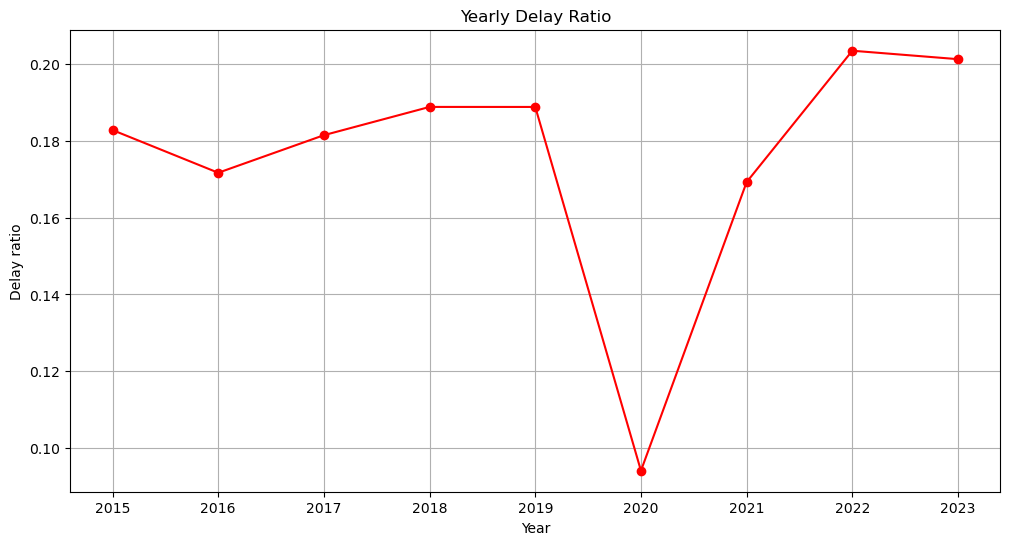

In [20]:
plt.figure(figsize=(12,6))
plt.plot(yearly['year'],yearly['delay_ratio'],color = 'red', marker = 'o')
plt.title('Yearly Delay Ratio')
plt.xlabel('Year')
plt.ylabel('Delay ratio')
plt.grid(True)
plt.show()

- Despite having the **highest number of flights**, years like **2018 and 2019** exhibited a **lower delay ratio** compared to more recent years.

- This suggests that **flight volume alone is not the main driver** of delays in recent years.

- Therefore, it's important to investigate **what specific factors or causes have contributed to the increased delay ratios** in the later years, despite lower or similar traffic levels.


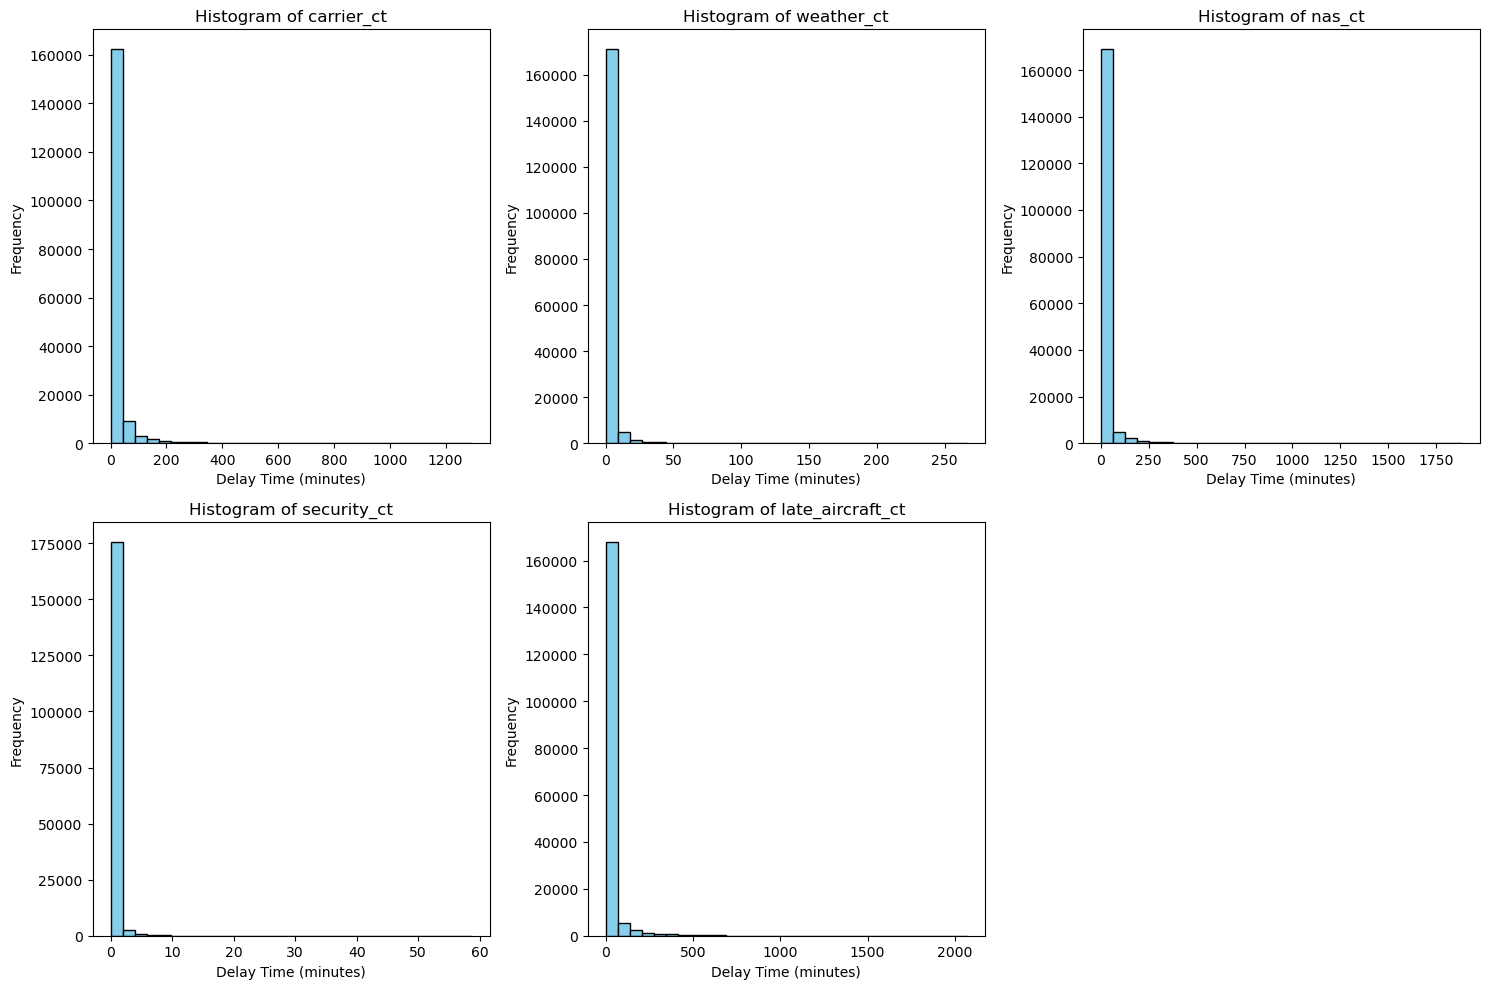

In [21]:
delay_columns = [
    'carrier_ct','weather_ct',	'nas_ct',	'security_ct',	'late_aircraft_ct'
]

# Count occurrences


# Plot histogram
plt.figure(figsize=(15, 10))

for i, col in enumerate(delay_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Delay Time (minutes)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

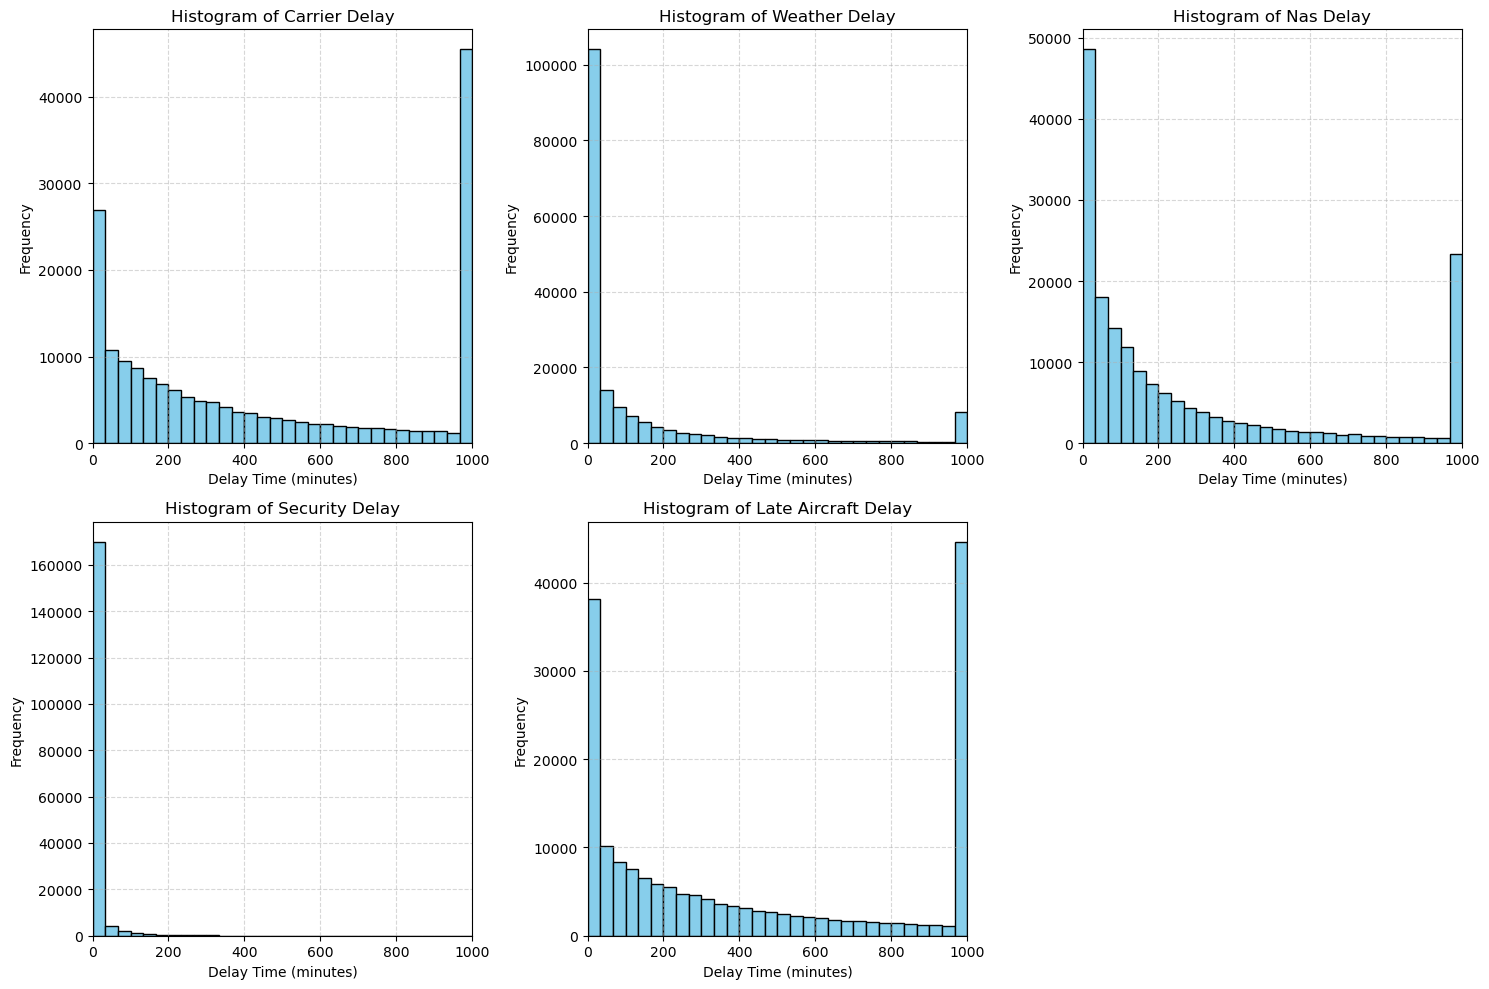

In [22]:


delay_columns = [
    'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]

# Set a maximum reasonable delay value (clip out extreme outliers)
max_delay = 1000  # adjust if needed

plt.figure(figsize=(15, 10))

for i, col in enumerate(delay_columns, 1):
    plt.subplot(2, 3, i)
    
    # Clip the values to reduce the effect of extreme outliers
    clipped = df[col].dropna().clip(upper=max_delay)
    
    plt.hist(clipped, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col.replace("_", " ").title()}')
    plt.xlabel('Delay Time (minutes)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlim(0, max_delay)  # consistent x-axis

plt.tight_layout()
plt.show()


## *Delay Causes**: Major contributors to delays include:
  - **Carrier Delays** and **Late Aircraft Delays**, with the highest frequency and magnitude.
  - **Weather and NAS Delays**, showing sharp right-skewed distributions, suggesting most delays are short, but rare extreme delays do occur.
  - **Security Delays**, while less frequent, are consistently low in duration, typically under **10 minutes**.

In [23]:
df['delay_rate'] = df['arr_del15'] / df['arr_flights']
df['delayed'] = (df['delay_rate'] > 0.10).astype(int)  # Only label delayed if >10% were late


In [24]:
# Count number of 0s and 1s in the 'high_delay' column
print(df['delayed'].value_counts())


delayed
1    137254
0     42084
Name: count, dtype: int64


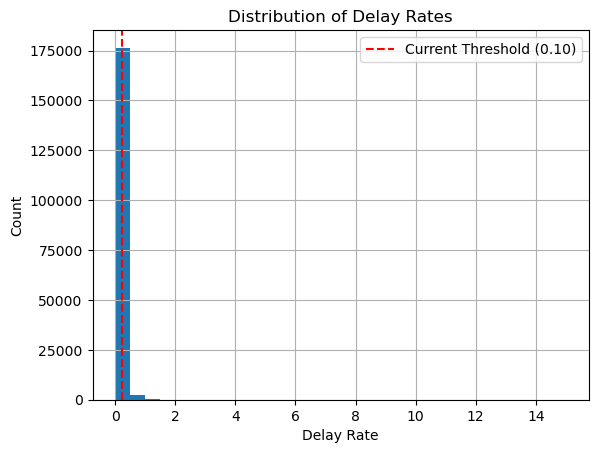

In [25]:

df['delay_rate'].hist(bins=30)
plt.axvline(0.24, color='red', linestyle='--', label='Current Threshold (0.10)')
plt.xlabel('Delay Rate')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Delay Rates')
plt.show()


In [26]:
df['delay_rate'].quantile([0.25, 0.5, 0.75, 0.9, 0.95])


0.25    0.105263
0.50    0.166667
0.75    0.238095
0.90    0.318182
0.95    0.373817
Name: delay_rate, dtype: float64

In [27]:
features = [
    'carrier_ct',        # delays caused by airline
    'weather_ct',        # delays caused by weather
    'nas_ct',            # air traffic control/system delay
    'security_ct',       # security-related delay
    'late_aircraft_ct',  # delay from previous aircraft
 
]

In [28]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Initialize insights dictionary
insights = {}

# Derived columns
df['delay_rate'] = df['arr_del15'] / df['arr_flights']
df['delayed_flights'] = df['arr_del15']
df['total_flights'] = df['arr_flights']

# === 1. TEMPORAL TREND ANALYSIS ===
temporal_analysis = df.groupby(['year', 'month']).agg({
    'delay_rate': 'mean',
    'arr_delay': 'mean',
    'total_flights': 'sum',
    'delayed_flights': 'sum'
}).reset_index()

temporal_analysis['time_index'] = (temporal_analysis['year'] - temporal_analysis['year'].min()) * 12 + temporal_analysis['month']

delay_trend_corr = pearsonr(temporal_analysis['time_index'], temporal_analysis['delay_rate'])
volume_trend_corr = pearsonr(temporal_analysis['time_index'], temporal_analysis['total_flights'])

print("📊 TEMPORAL TREND ANALYSIS:")
print(f"   Delay Rate Trend: r={delay_trend_corr[0]:.3f}, p={delay_trend_corr[1]:.3e}")
print(f"   Flight Volume Trend: r={volume_trend_corr[0]:.3f}, p={volume_trend_corr[1]:.3e}")

insights['temporal'] = {
    'delay_trend': delay_trend_corr,
    'volume_trend': volume_trend_corr
}

# === 2. ADVANCED ROOT CAUSE ANALYSIS ===
print("\n🎯 ADVANCED ROOT CAUSE ANALYSIS")
print("=" * 60)

cause_columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

for col in cause_columns:
    df[col] = df[col].fillna(0)

df['total_delay_minutes'] = df[cause_columns].sum(axis=1)

for col in cause_columns:
    pct_col = f"{col}_pct"
    df[pct_col] = np.where(
        df['total_delay_minutes'] > 0,
        (df[col] / df['total_delay_minutes']) * 100,
        0
    )

cause_totals = df[cause_columns].sum()
total_delay_pool = cause_totals.sum()
cause_percentages = (cause_totals / total_delay_pool) * 100

print("🔍 DELAY CAUSE BREAKDOWN:")
print("-" * 40)
for cause, percentage in cause_percentages.sort_values(ascending=False).items():
    clean_name = cause.replace('_delay', '').replace('_', ' ').title()
    print(f"{clean_name:<20}: {percentage:>6.2f}%")

controllable_total = df[['carrier_delay', 'late_aircraft_delay']].sum().sum()
semi_controllable_total = df[['nas_delay', 'security_delay']].sum().sum()
uncontrollable_total = df['weather_delay'].sum()

controllability_breakdown = {
    'Highly Controllable': (controllable_total / total_delay_pool) * 100,
    'Partially Controllable': (semi_controllable_total / total_delay_pool) * 100,
    'Uncontrollable': (uncontrollable_total / total_delay_pool) * 100
}

print("\n🎛️  CONTROLLABILITY ANALYSIS:")
print("-" * 40)
for category, percentage in controllability_breakdown.items():
    print(f"{category:<22}: {percentage:>6.2f}%")

insights['causes'] = {
    'breakdown': cause_percentages.to_dict(),
    'controllability': controllability_breakdown
}

# === 3. CARRIER PERFORMANCE DEEP DIVE ===
print("\n✈️  ADVANCED CARRIER PERFORMANCE BENCHMARKING")
print("=" * 60)

carrier_metrics = df.groupby(['carrier', 'carrier_name']).agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_delay': 'mean',
    'total_delay_minutes': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()

carrier_metrics.rename(columns={
    'arr_flights': 'total_flights',
    'arr_del15': 'delayed_flights'
}, inplace=True)

carrier_metrics['delay_rate'] = (carrier_metrics['delayed_flights'] / carrier_metrics['total_flights']) * 100
carrier_metrics['avg_delay_when_delayed'] = carrier_metrics['total_delay_minutes'] / carrier_metrics['delayed_flights']
carrier_metrics['operational_efficiency'] = (
    (carrier_metrics['carrier_delay'] + carrier_metrics['late_aircraft_delay']) /
    carrier_metrics['total_delay_minutes']
) * 100

major_carriers = carrier_metrics[carrier_metrics['total_flights'] > 1000].copy()
industry_delay_rate = major_carriers['delay_rate'].mean()
industry_std = major_carriers['delay_rate'].std()

major_carriers['performance_zscore'] = (
    major_carriers['delay_rate'] - industry_delay_rate
) / industry_std

major_carriers['performance_category'] = pd.cut(
    major_carriers['performance_zscore'],
    bins=[-np.inf, -1, -0.5, 0.5, 1, np.inf],
    labels=['Excellent', 'Above Average', 'Average', 'Below Average', 'Poor']
)

print("📊 CARRIER PERFORMANCE DISTRIBUTION:")
print("-" * 40)
perf_dist = major_carriers['performance_category'].value_counts()
for category, count in perf_dist.items():
    print(f"{category:<15}: {count:>3} carriers")

print("\n🏆 TOP 3 PERFORMERS (Lowest Delay Rate):")
top_performers = major_carriers.nsmallest(3, 'delay_rate')
for _, carrier in top_performers.iterrows():
    print(f"   {carrier['carrier_name'][:30]:<30}: {carrier['delay_rate']:>6.2f}%")

print("\n⚠️  BOTTOM 3 PERFORMERS (Highest Delay Rate):")
bottom_performers = major_carriers.nlargest(3, 'delay_rate')
for _, carrier in bottom_performers.iterrows():
    print(f"   {carrier['carrier_name'][:30]:<30}: {carrier['delay_rate']:>6.2f}%")


📊 TEMPORAL TREND ANALYSIS:
   Delay Rate Trend: r=0.057, p=5.563e-01
   Flight Volume Trend: r=0.292, p=2.163e-03

🎯 ADVANCED ROOT CAUSE ANALYSIS
🔍 DELAY CAUSE BREAKDOWN:
----------------------------------------
Late Aircraft       :  38.87%
Carrier             :  34.31%
Nas                 :  21.22%
Weather             :   5.41%
Security            :   0.18%

🎛️  CONTROLLABILITY ANALYSIS:
----------------------------------------
Highly Controllable   :  73.19%
Partially Controllable:  21.40%
Uncontrollable        :   5.41%

✈️  ADVANCED CARRIER PERFORMANCE BENCHMARKING
📊 CARRIER PERFORMANCE DISTRIBUTION:
----------------------------------------
Average        :  18 carriers
Poor           :   8 carriers
Excellent      :   6 carriers
Above Average  :   5 carriers
Below Average  :   2 carriers

🏆 TOP 3 PERFORMERS (Lowest Delay Rate):
   Cape Air                      :   8.91%
   Hawaiian Airlines Inc.        :  10.46%
   Delta Air Lines Inc.          :  13.26%

⚠️  BOTTOM 3 PERFORMERS (

---
## Carrier-wise Delay Analysis (RCA)

In [29]:
carrier_summary = df.groupby('carrier').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'carrier_ct': 'sum',
    'weather_ct': 'sum',
    'nas_ct': 'sum',
    'security_ct': 'sum',
    'late_aircraft_ct': 'sum',
    'carrier_delay': 'sum',
    'weather_delay': 'sum',
    'nas_delay': 'sum',
    'security_delay': 'sum',
    'late_aircraft_delay': 'sum'
}).reset_index()


In [30]:
carrier_summary['delay_ratio'] = carrier_summary['arr_del15'] / carrier_summary['arr_flights']

for cause in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']:
    carrier_summary[f'{cause}_ct_per_flight'] = carrier_summary[f'{cause}_ct'] / carrier_summary['arr_flights']
    carrier_summary[f'{cause}_min_per_flight'] = carrier_summary[f'{cause}_delay'] / carrier_summary['arr_flights']
    carrier_summary[f'{cause}_ct_ratio'] = carrier_summary[f'{cause}_ct'] / carrier_summary['arr_del15']
    carrier_summary[f'{cause}_min_ratio'] = carrier_summary[f'{cause}_delay'] / carrier_summary['arr_del15']


1. Total Flights vs Delayed Flights (Carrier-wise)

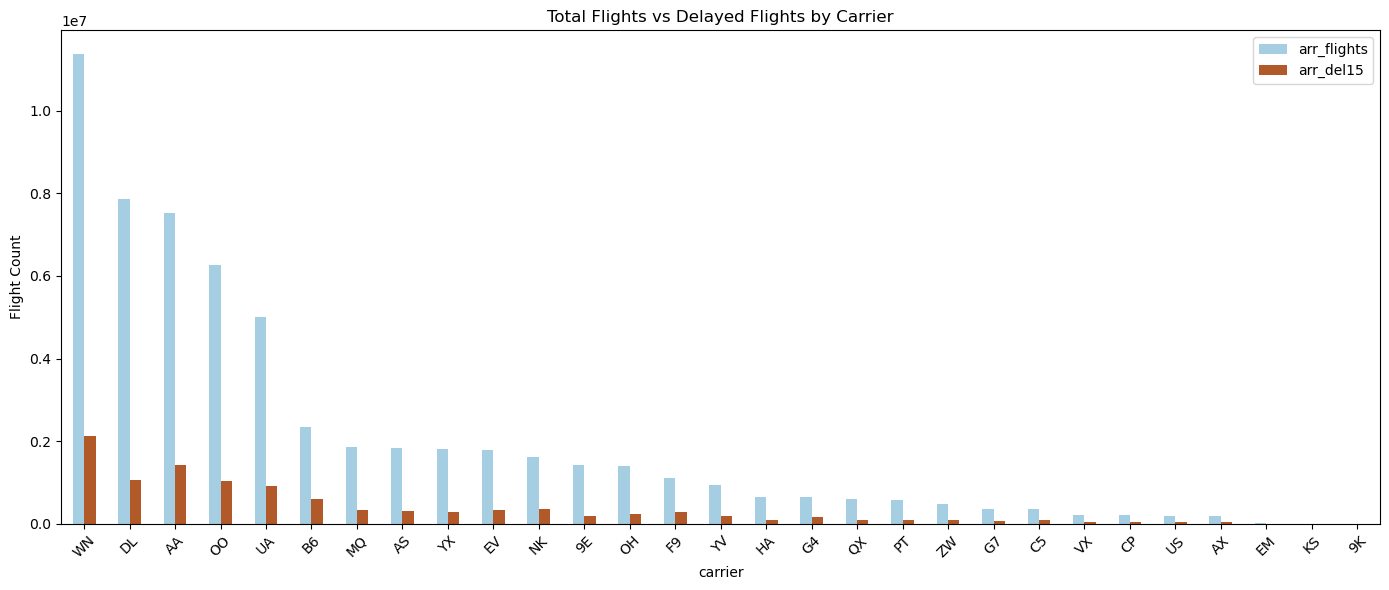

In [31]:
carrier_summary_sorted = carrier_summary.sort_values(by='arr_flights', ascending=False)

carrier_summary_sorted[['carrier', 'arr_flights', 'arr_del15']].set_index('carrier').plot(
    kind='bar', figsize=(14, 6), colormap='Paired'
)
plt.title('Total Flights vs Delayed Flights by Carrier')
plt.ylabel('Flight Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- WN has the highest total flights with highest delayed flights
- kS and 9k has negligible total flights and delayed flights compared to others, theredore tey can be considered has outliers

2. Delay Ratio per Carrier

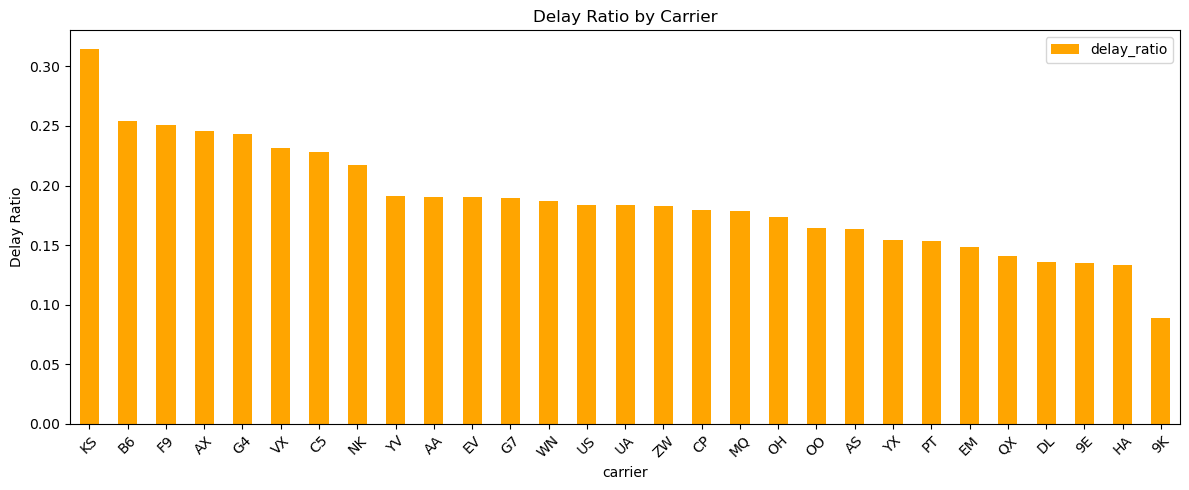

In [32]:
carrier_summary.sort_values(by='delay_ratio', ascending=False).plot(
    x='carrier', y='delay_ratio', kind='bar', figsize=(12, 5), color='orange'
)
plt.title('Delay Ratio by Carrier')
plt.ylabel('Delay Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- KS has highest delay ratio but if considering it outlier , B6 has highest delay ratio

3. Cause-wise Delay Count Ratio (per Total Flights)

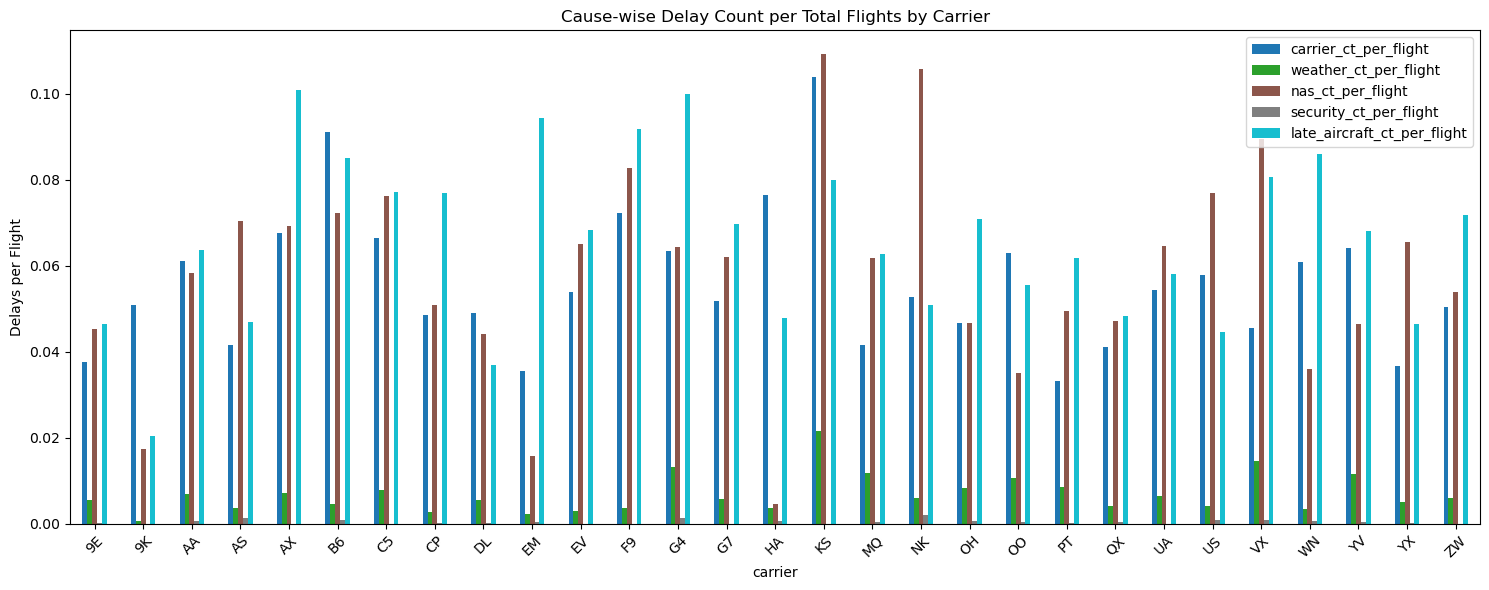

In [33]:
count_col = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
count_ratio_total = [f'{c}_ct_per_flight' for c in ['carrier', 'weather', 'nas', 'security', 'late_aircraft']]

carrier_summary[count_ratio_total + ['carrier']].set_index('carrier').plot(
    kind='bar', figsize=(15, 6), colormap='tab10'
)
plt.title('Cause-wise Delay Count per Total Flights by Carrier')
plt.ylabel('Delays per Flight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


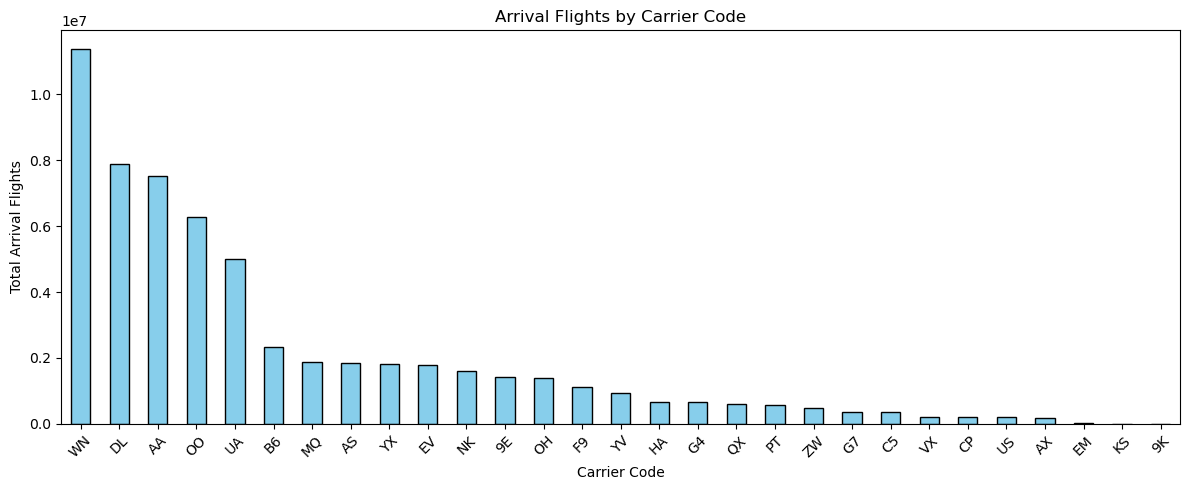

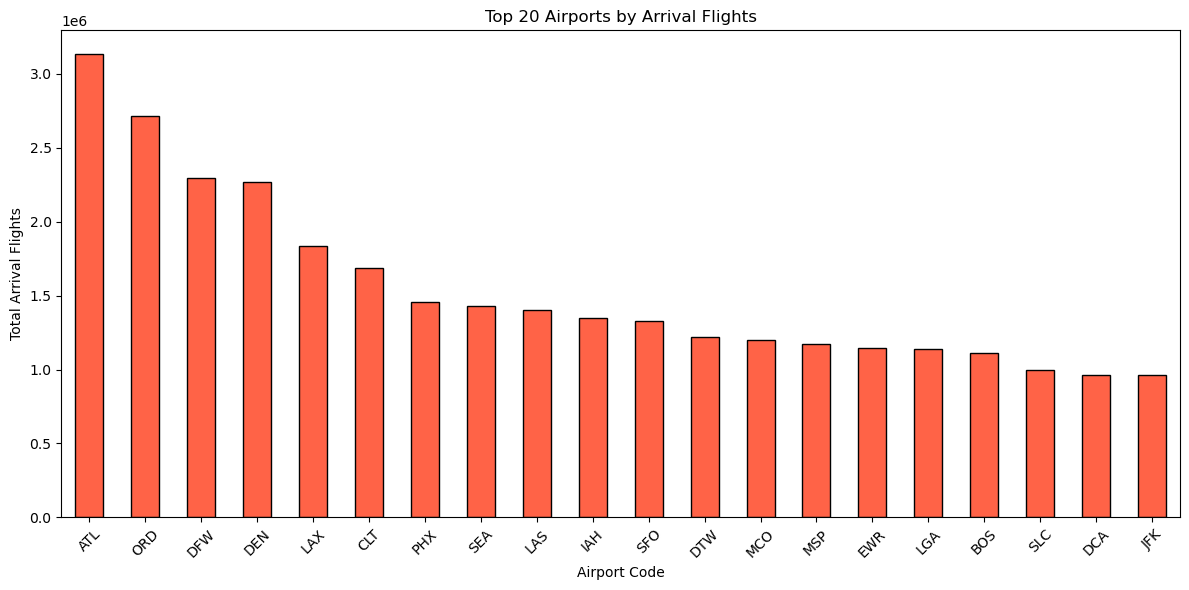

In [34]:



# 'carrier', 'carrier_name', 'airport', 'arr_flights'

# 1. Group and plot by carrier
carrier_group = df.groupby('carrier')['arr_flights'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
carrier_group.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Arrival Flights by Carrier Code")
plt.ylabel("Total Arrival Flights")
plt.xlabel("Carrier Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#2. Group and plot by airport
top_airports = df.groupby('airport')['arr_flights'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
top_airports.plot(kind='bar', color='tomato', edgecolor='black')
plt.title("Top 20 Airports by Arrival Flights")
plt.ylabel("Total Arrival Flights")
plt.xlabel("Airport Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart ranks airports by the number of arriving flights. ATL (Atlanta) has the highest traffic, followed by ORD (Chicago) and DFW (Dallas).



## Dominant Carriers: Southwest (WN), Delta (DL), and American (AA) show the highest flight volumes, indicating they handle the majority of air traffic.

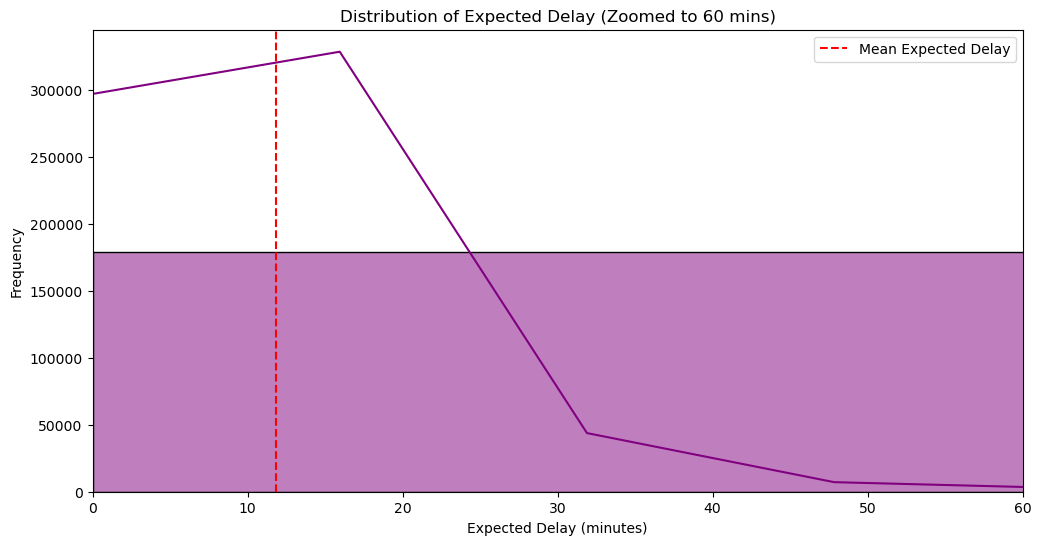

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df['expected_delay'] = df['arr_delay'] / df['arr_flights']
sns.histplot(df['expected_delay'], bins=50, kde=True, color='purple')
plt.title("Distribution of Expected Delay (Zoomed to 60 mins)")
plt.xlabel("Expected Delay (minutes)")
plt.ylabel("Frequency")
plt.axvline(df['expected_delay'].mean(), color='red', linestyle='--', label='Mean Expected Delay')
plt.xlim(0, 60)
plt.legend()
plt.show()


This area plot shows the frequency of expected delays under 60 minutes. The majority of delays cluster under 20 minutes, with a mean delay of around 12 minutes marked by a red dashed line.

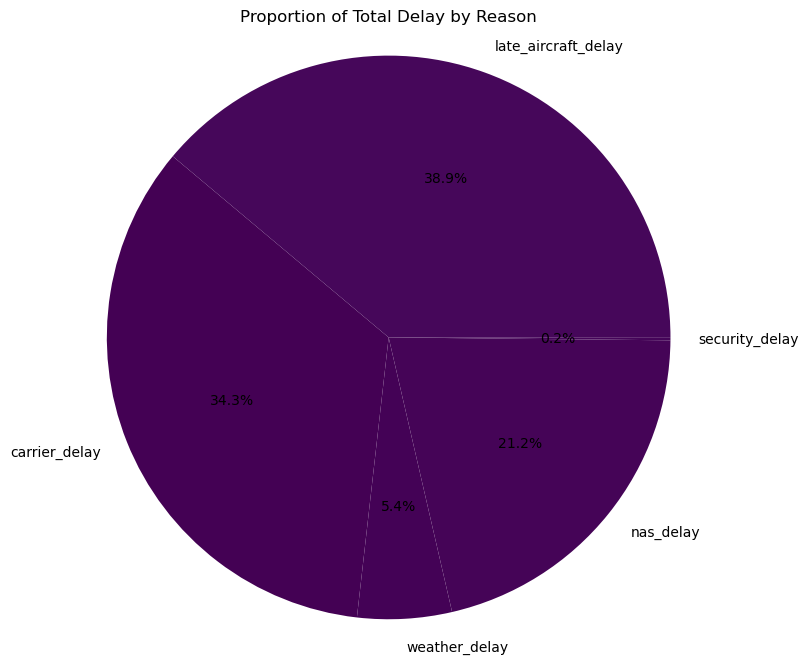

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define delay columns
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Step 2: Sum each delay reason across all rows
delay_totals = df[delay_cols].sum()

# Step 3: Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(delay_totals, labels=delay_totals.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title("Proportion of Total Delay by Reason")
plt.axis('equal')  # Ensures it's a circle
plt.show()


## Primary Culprit: Late aircraft delays dominate at ~35%, revealing cascading operational issues from previous flights as the biggest disruptor to schedules.

Secondary Factors: Carrier-caused delays (airline operations) and NAS delays (air traffic/airport systems) each account for ~30%, showing airlines and infrastructure share equal blame.

Minor Impact: Weather delays represent just 3-4%, confirming that while severe weather causes highly visible disruptions, it's not the most frequent delay source.

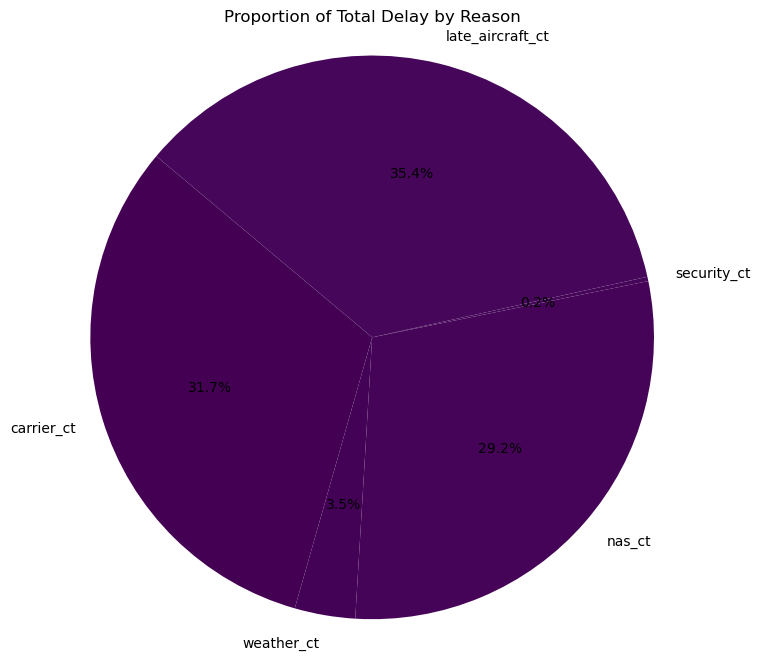

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define delay columns
delay_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Step 2: Sum each delay reason across all rows
delay_totals = df[delay_cols].sum()

# Step 3: Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(delay_totals, labels=delay_totals.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
plt.title("Proportion of Total Delay by Reason")
plt.axis('equal')  # Ensures it's a circle
plt.show()


In [38]:

print(df.columns.tolist())


['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'delay_rate', 'delayed', 'delayed_flights', 'total_flights', 'total_delay_minutes', 'carrier_delay_pct', 'weather_delay_pct', 'nas_delay_pct', 'security_delay_pct', 'late_aircraft_delay_pct', 'expected_delay']


---
### 📊 Cancellation & Diversion Analysis Summary

| Category                     | Metric                             | Value / Insight                          |
|-----------------------------|-------------------------------------|-------------------------------------------|
| **Year-wise**               | Highest Cancellation Ratio          | **2020** *(COVID-19 impact)*              |
|                             | Diversion Ratio                     | Consistent across years                   |
| **Month-wise**              | Highest Cancellation Ratio          | **April** *(due to April 2020 lockdown)*  |
|                             | Diversion Ratio                     | Consistent across months                  |
| **Carrier-wise**            | Highest Cancellation Ratio          | **KS**                                     |
|                             | Highest Diversion Ratio             | **KS**                                     |
| **Airport-wise**            | Highest Cancellation Ratio          | **MMH** *(Mammoth Yosemite Airport)*       |
|                             | Highest Diversion Ratio             | **SUN** *(Friedman Memorial Airport)*      |

---

# ✈️ Final EDA Conclusion: US Flight Delay Analysis

## 🧭 Overview
The exploratory data analysis (EDA) conducted on US flight data provided deep insights into flight delays, their causes, and variations across time, airports, and carriers. The analysis examined delay counts, delay durations, cancellations, and diversions from multiple perspectives to identify key patterns and potential issues in the air transportation system.

---

## 📅 Temporal Trends
- **2019** had the highest number of flights and delayed flights.
- **2020** saw the lowest number of flights and delay ratios due to COVID-19.
- **2022** recorded the highest overall delay ratio.
- **July** consistently showed peak delayed flights, especially in 2023.
- **February** typically had the fewest flights (shortest month).
- **Late Aircraft** delays dominate across all months and years, followed by **Carrier** and **NAS** delays.

---

## 🛫 Airport-Level Insights
- **ORD (Chicago O'Hare)** had the most delayed flights; **NAS** was the primary delay cause.
- **ATL (Atlanta)** had the second-highest delayed flights; delays were mainly due to **Late Aircraft**.
- **EWR (Newark)** led in **NAS delay minutes**.
- **DUT** and **ILG** frequently had the highest **delay ratios** across months.
- **YNG** had a 100% delay rate but only 2 flights, indicating outlier behavior.
- No airport showed a consistently high delay ratio across all years.

---

## 🛩️ Carrier-Level Insights
- **WN (Southwest Airlines)** had the highest number of total and delayed flights.
- **KS** recorded the highest delay ratio, though likely an outlier.
- Excluding outliers, **B6** had the highest delay ratio.
- **HA (Hawaiian Airlines)** consistently showed the lowest delays.
- **Delay cause rankings** (by both count and minutes):
  1. **Late Aircraft**
  2. **Carrier**
  3. **NAS**
  4. **Weather**
  5. **Security**
- Specific carriers led in individual delay causes:
  - **AX**: Highest Late Aircraft delay minutes per flight.
  - **OO**: Highest Carrier delay minutes per delayed flight.
  - **NK**: Highest NAS delay ratios and minutes.
  - **9K** and **KS**: Outliers in both volume and ratios.

---

## ❌ Cancellations & Diversions
- **2020** (especially April) saw the highest cancellation rates.
- **MMH** (Mammoth Yosemite Airport) had the highest airport cancellation ratio.
- **SUN** (Friedman Memorial Airport) had the highest diversion ratio.
- **KS** had the highest cancellation and diversion ratios among carriers.

---

## 📌 Final Takeaways
- **Late Aircraft delays** are the most critical area for operational improvement.
- Certain **airports and carriers** significantly contribute to system-wide delays.
- Seasonal and annual variations reveal important **planning windows** (e.g., buffer periods in July).
- **Outliers** (e.g., KS, DUT, YNG) should be treated cautiously in modeling or policy changes.
- This EDA sets a strong foundation for predictive modeling, such as estimating delay probabilities or classifying high-risk carriers/airports.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models to test
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# STEP 1: Create the target column (expected delay)
df = df[df['arr_flights'] > 0]  # Remove bad rows
df['expected_delay'] = df['arr_delay'] / df['arr_flights']

# STEP 2: Define only non-leaky input features
feature_cols = ['year', 'month', 'carrier', 'airport']
target_col = 'expected_delay'

X = df[feature_cols]
y = df[target_col]

# STEP 3: Define preprocessing
numeric_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# STEP 4: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 5: Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# STEP 6: Train and evaluate all models
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)


    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    print(f"\n{name}")
    print(f"Test MAE: {test_mae:.2f} minutes")
    print(f"Test RMSE: {test_rmse:.2f} minutes")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Linear Regression
Test MAE: 6.74 minutes
Test RMSE: 16.41 minutes


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Ridge
Test MAE: 6.74 minutes
Test RMSE: 16.41 minutes


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Lasso
Test MAE: 7.21 minutes
Test RMSE: 16.68 minutes


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Decision Tree
Test MAE: 6.27 minutes
Test RMSE: 17.27 minutes


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Gradient Boosting
Test MAE: 6.18 minutes
Test RMSE: 16.13 minutes



=== Logistic Regression ===
Accuracy : 0.6063900970224155
Precision: 0.4727852068533222
Recall   : 0.6921841541755889
F1 Score : 0.5618249534450652
Confusion Matrix:
 [[12699 10093]
 [ 4025  9051]]

=== Decision Tree ===
Accuracy : 0.680885468941675
Precision: 0.5496043822276324
Recall   : 0.6905781584582441
F1 Score : 0.6120788992069409
Confusion Matrix:
 [[15392  7400]
 [ 4046  9030]]

=== KNN ===
Accuracy : 0.7030500724880115
Precision: 0.5809899138334113
Recall   : 0.665188130926889
F1 Score : 0.6202445894391557
Confusion Matrix:
 [[16519  6273]
 [ 4378  8698]]

=== Gradient Boosting ===
Accuracy : 0.6956897513103603
Precision: 0.564442058805988
Recall   : 0.7237687366167024
F1 Score : 0.6342525885467278
Confusion Matrix:
 [[15489  7303]
 [ 3612  9464]]


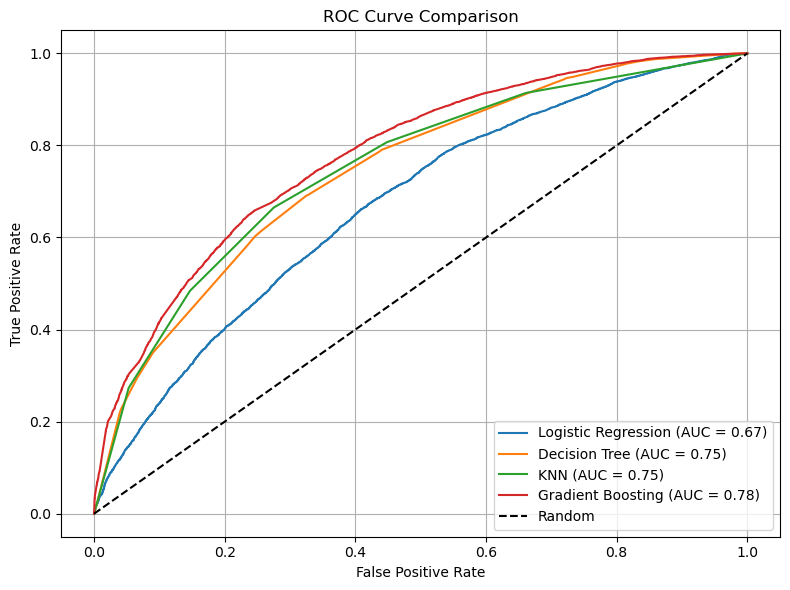


✅ Best Model Based on F1-Score: Gradient Boosting
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.606390   0.472785  0.692184  0.561825  0.671400
1        Decision Tree  0.680885   0.549604  0.690578  0.612079  0.746806
2                  KNN  0.703050   0.580990  0.665188  0.620245  0.751438
3    Gradient Boosting  0.695690   0.564442  0.723769  0.634253  0.779054


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

warnings.filterwarnings("ignore")

# -------------------------------
# STEP 1: Create Target Column
# -------------------------------
delay_threshold = 0.2
df['delayed'] = (df['arr_del15'] / df['arr_flights'] > delay_threshold).astype(int)

# -------------------------------
# STEP 2: Select Features/Target
# -------------------------------
features = ['month', 'carrier', 'weather_ct', 'nas_ct', 'late_aircraft_ct']
X = df[features]
y = df['delayed']

# -------------------------------
# STEP 3: Preprocessing Pipelines
# -------------------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# -------------------------------
# STEP 4: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -------------------------------
# STEP 5: Define Models
# -------------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=300, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42)
}

# -------------------------------
# STEP 6: Train, Evaluate, Select Best
# -------------------------------
plt.figure(figsize=(8, 6))
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    try:
        y_proba = pipeline.predict_proba(X_test)[:, 1]
    except AttributeError:
        try:
            y_proba = pipeline.decision_function(X_test)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
        except:
            y_proba = y_pred

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC': roc_auc
    })

    print(f"\n=== {name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print("Confusion Matrix:\n", conf_matrix)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# -------------------------------
# STEP 7: ROC Plot
# -------------------------------
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# STEP 8: Select Best Model
# -------------------------------
results_df = pd.DataFrame(results)
best_model_name = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]['Model']

print("\n==============================")
print("✅ Best Model Based on F1-Score:", best_model_name)
print("==============================")
print(results_df)


.
### 🔍 Model Evaluation Summary

We evaluated four classification models—**Logistic Regression**, **Decision Tree**, **K-Nearest Neighbors**, and **Gradient Boosting**—to predict whether flight delay rates exceeded 20%.

Each model was assessed using metrics such as **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **AUC-ROC**. To address class imbalance, we applied **SMOTE** and used `class_weight='balanced'` where applicable.

📌 **Best Model**: Gradient Boosting achieved the highest F1-Score (**0.634**), with a strong balance between precision and recall. It also recorded the highest AUC (**0.779**), indicating superior overall classification performance.

This model was selected as the final classifier for deployment.
